In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import HistGradientBoostingRegressor


In [18]:
# Load the dataset
data = pd.read_csv('movies.csv')

# Remove any rows with missing values
data.dropna(inplace=True)

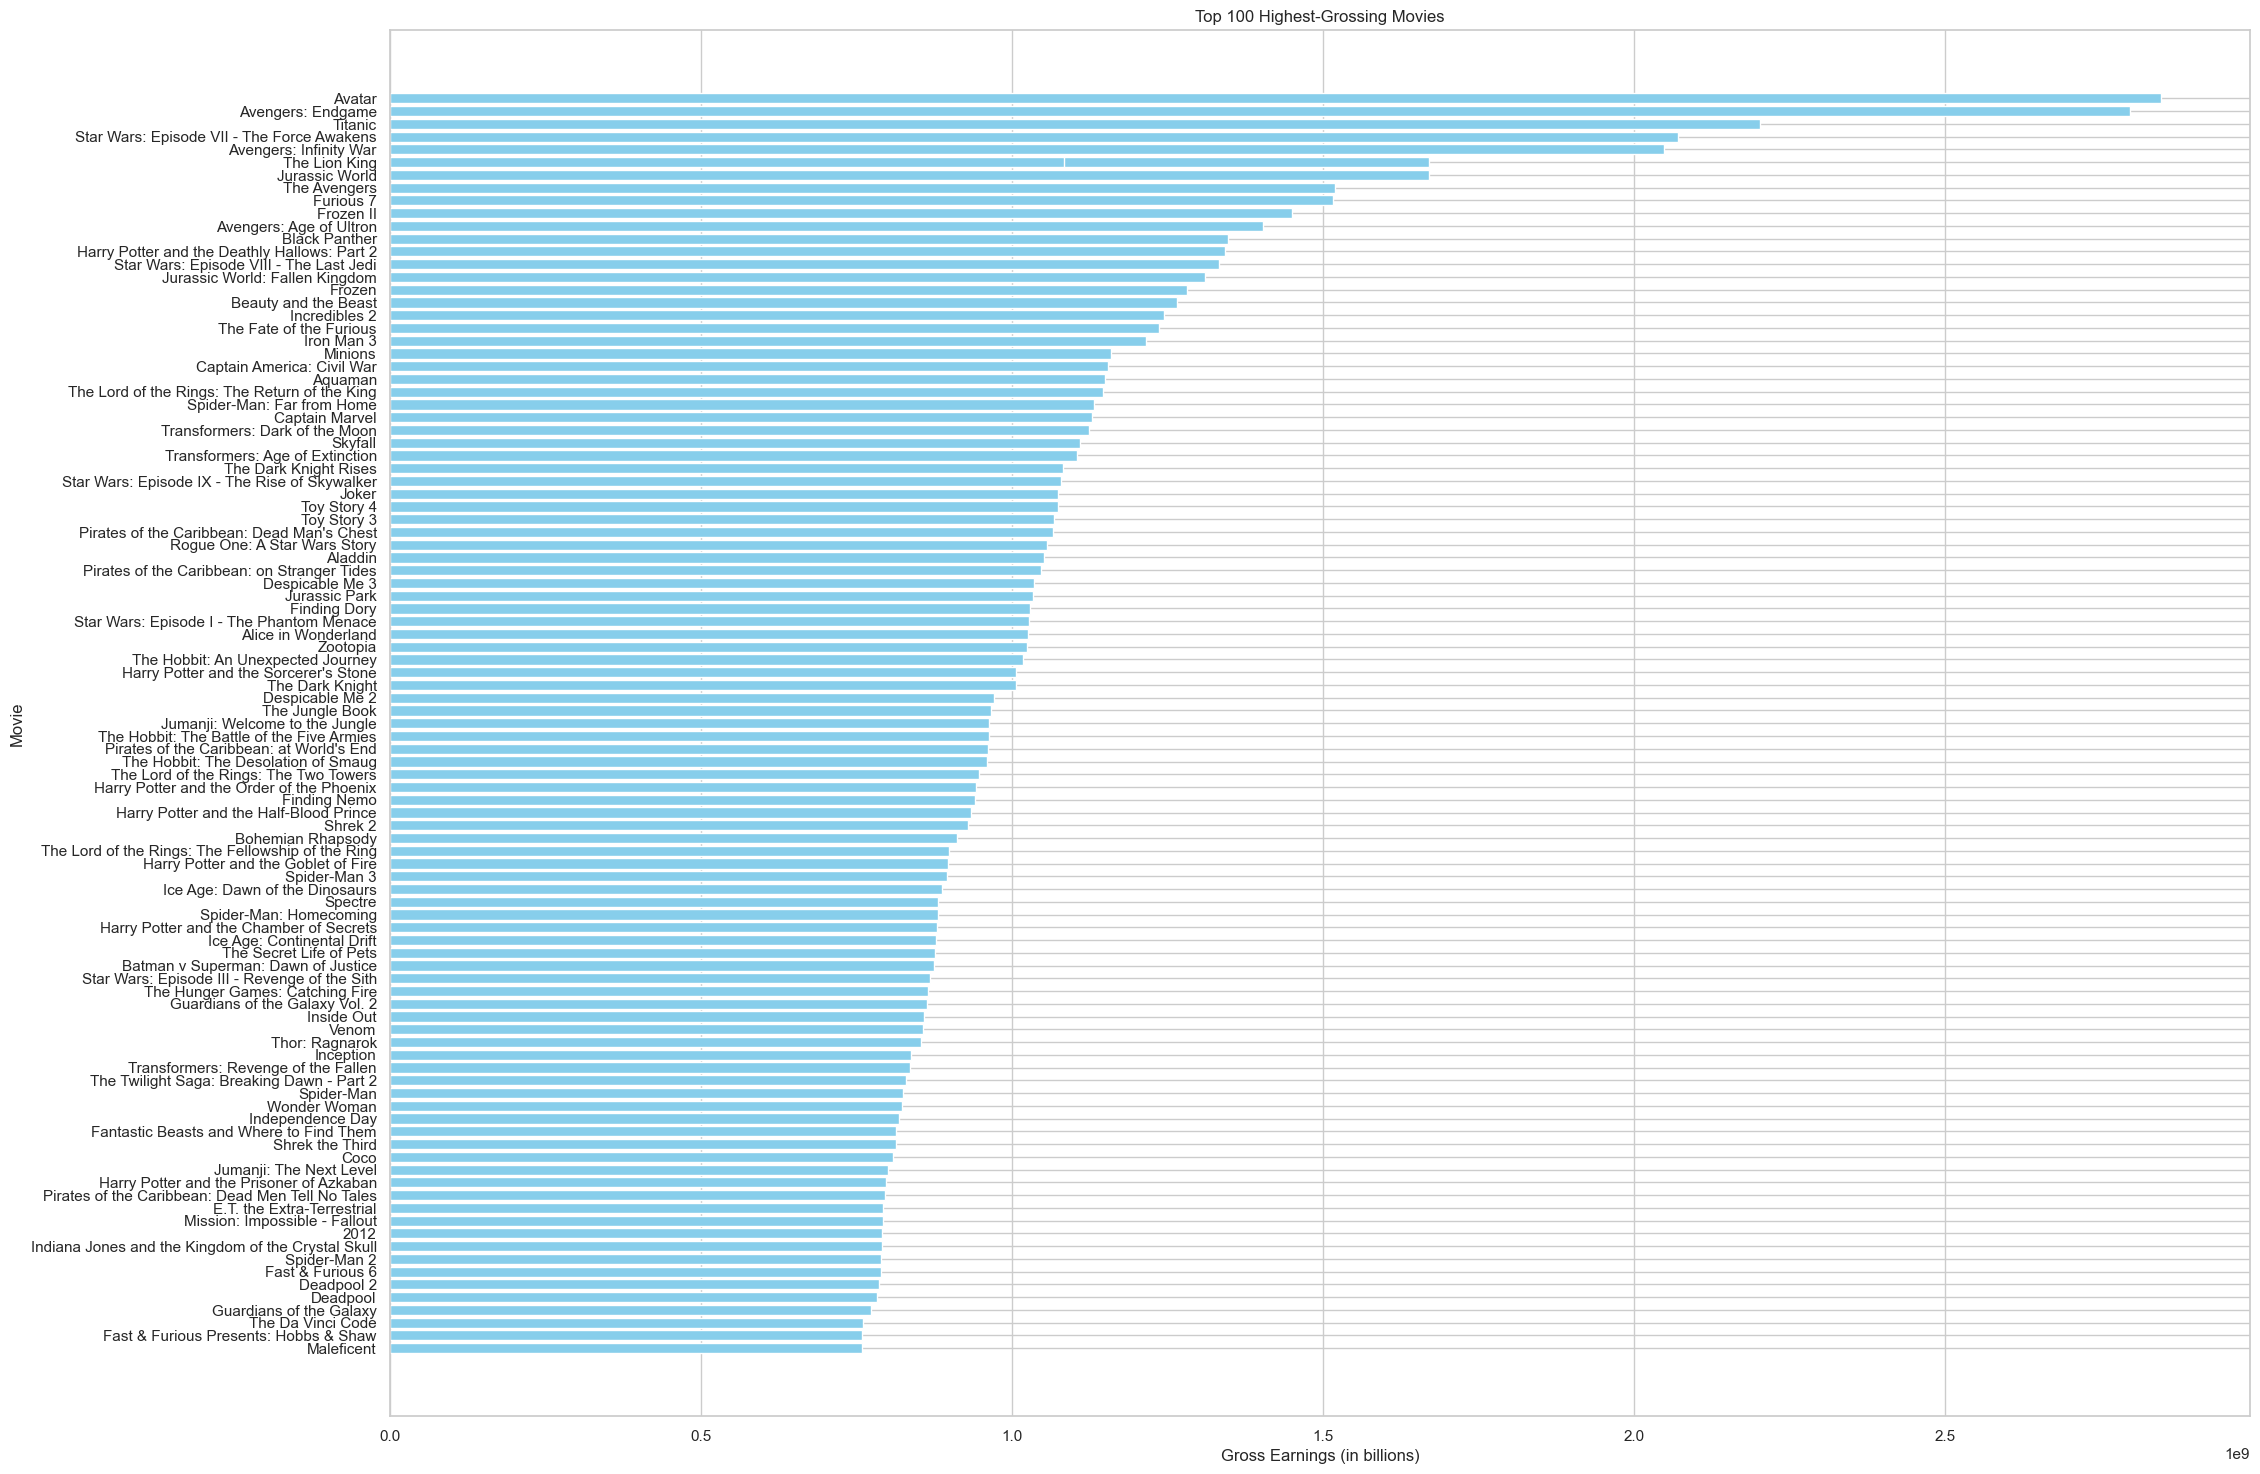

In [19]:
# Sort the dataset by gross in descending order and select the top 100 movies
top_100_highest_grossing = data.sort_values(by='gross', ascending=False).head(100)

# Create a bar graph for the top 100 highest-grossing movies
plt.figure(figsize=(24, 18))
plt.barh(top_100_highest_grossing['name'], top_100_highest_grossing['gross'], color='skyblue')
plt.xlabel('Gross Earnings (in billions)')
plt.ylabel('Movie')
plt.title('Top 100 Highest-Grossing Movies')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest grossing movie at the top
plt.show()

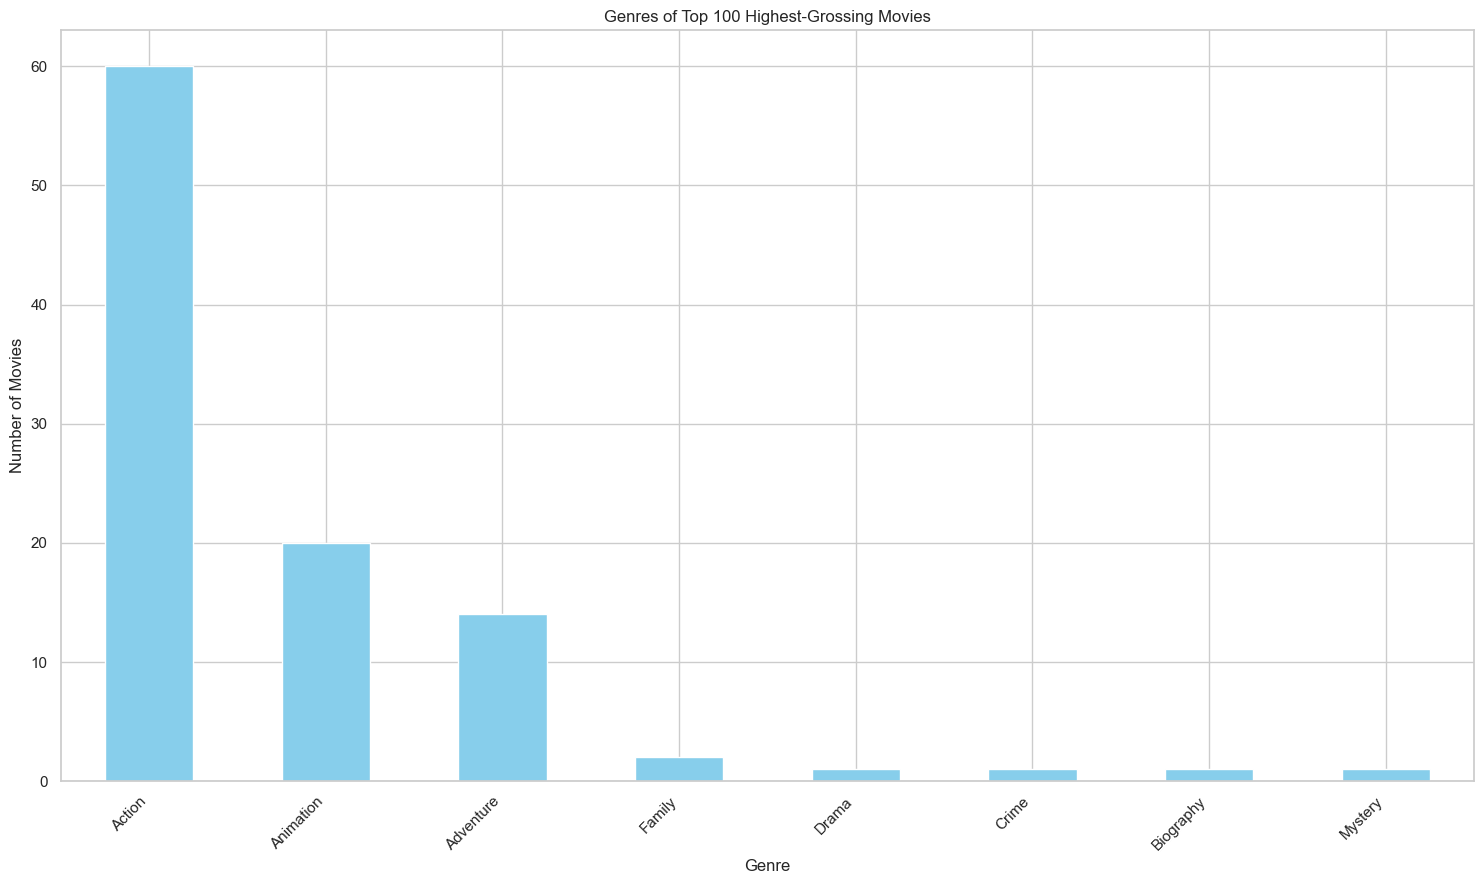

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('movies.csv')

# Sort the dataset by gross in descending order and select the top 100 movies
top_100_highest_grossing = data.sort_values(by='gross', ascending=False).head(100)

# Create a bar plot for the genres of the top 100 highest-grossing movies
plt.figure(figsize=(15, 9))
top_100_highest_grossing['genre'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Genres of Top 100 Highest-Grossing Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


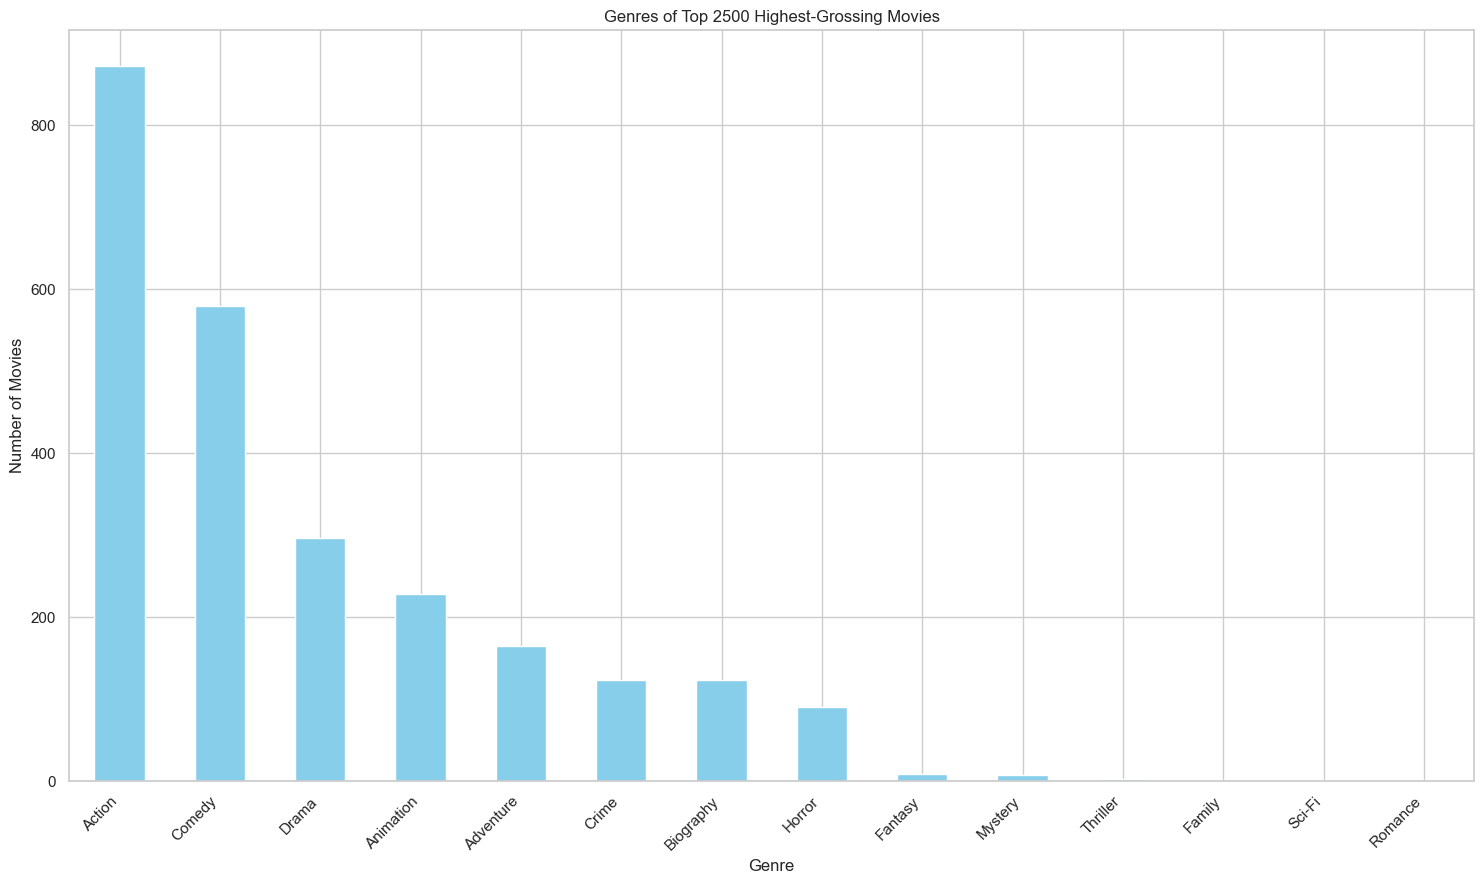

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('movies.csv')

# Sort the dataset by gross in descending order and select the top 2500 movies
top_100_highest_grossing = data.sort_values(by='gross', ascending=False).head(2500)

# Create a bar plot for the genres of the top 100 highest-grossing movies
plt.figure(figsize=(15, 9))
top_100_highest_grossing['genre'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Genres of Top 2500 Highest-Grossing Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


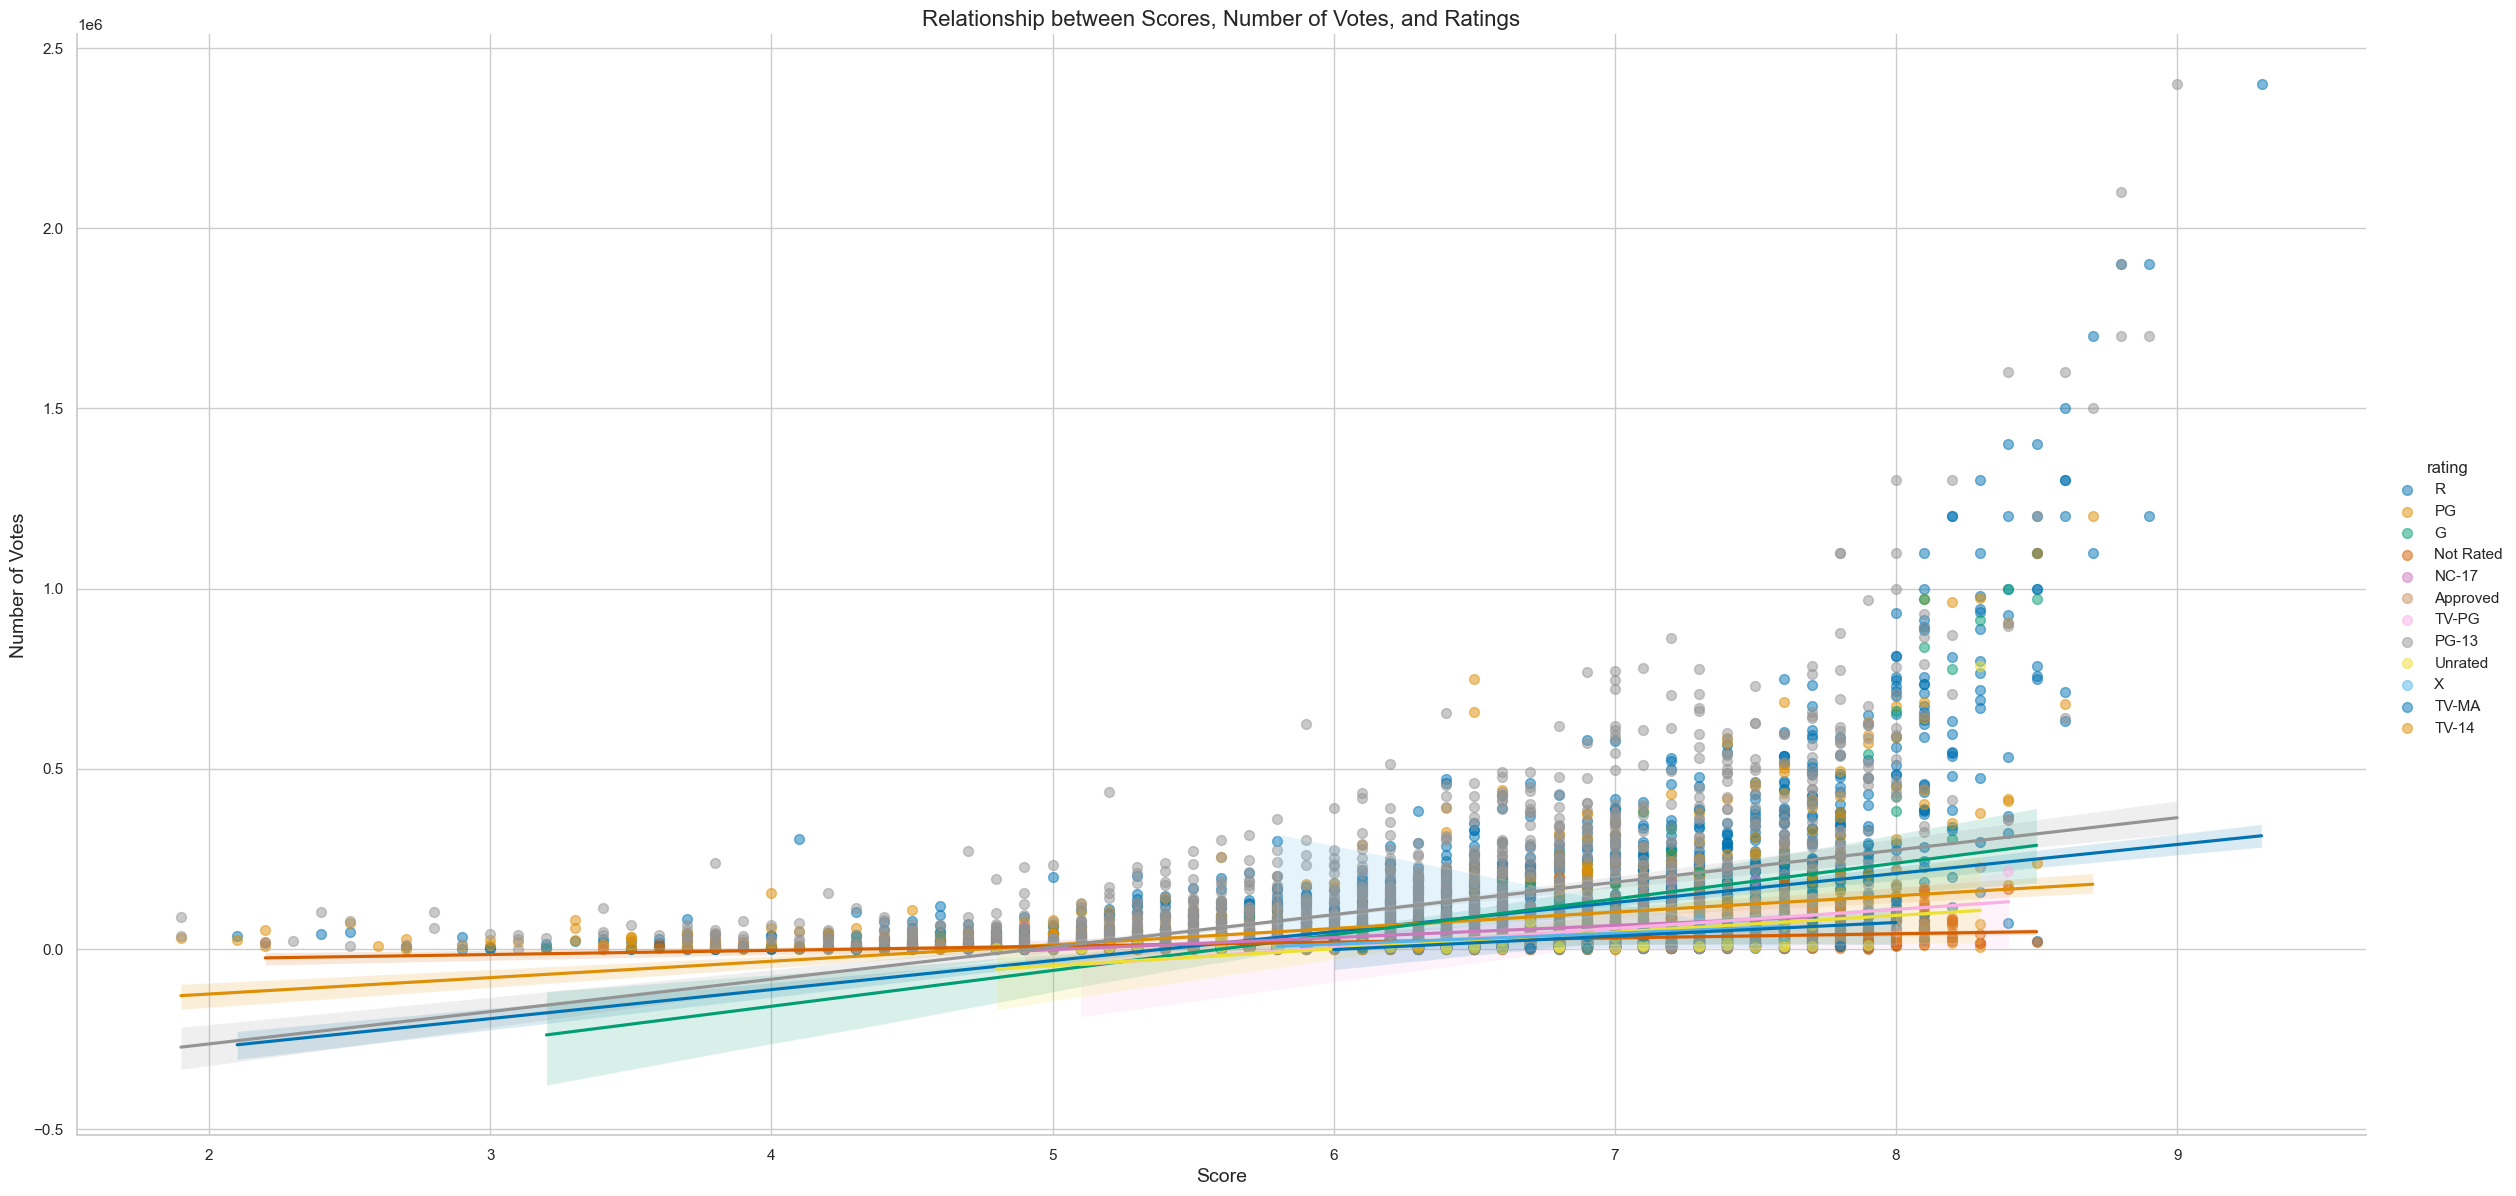

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('movies.csv')

# Create a scatter plot with lmplot and adjust size
sns.set(style="whitegrid")
g = sns.lmplot(x="score", y="votes", hue="rating", data=data,
               palette="colorblind", scatter_kws={"s": 50, "alpha": 0.5},
               height=12, aspect=2)  # Adjust height and aspect ratio

# Set labels and title with larger font sizes
g.set_axis_labels("Score", "Number of Votes", fontsize=14)
plt.title("Relationship between Scores, Number of Votes, and Ratings", fontsize=16)

plt.show()


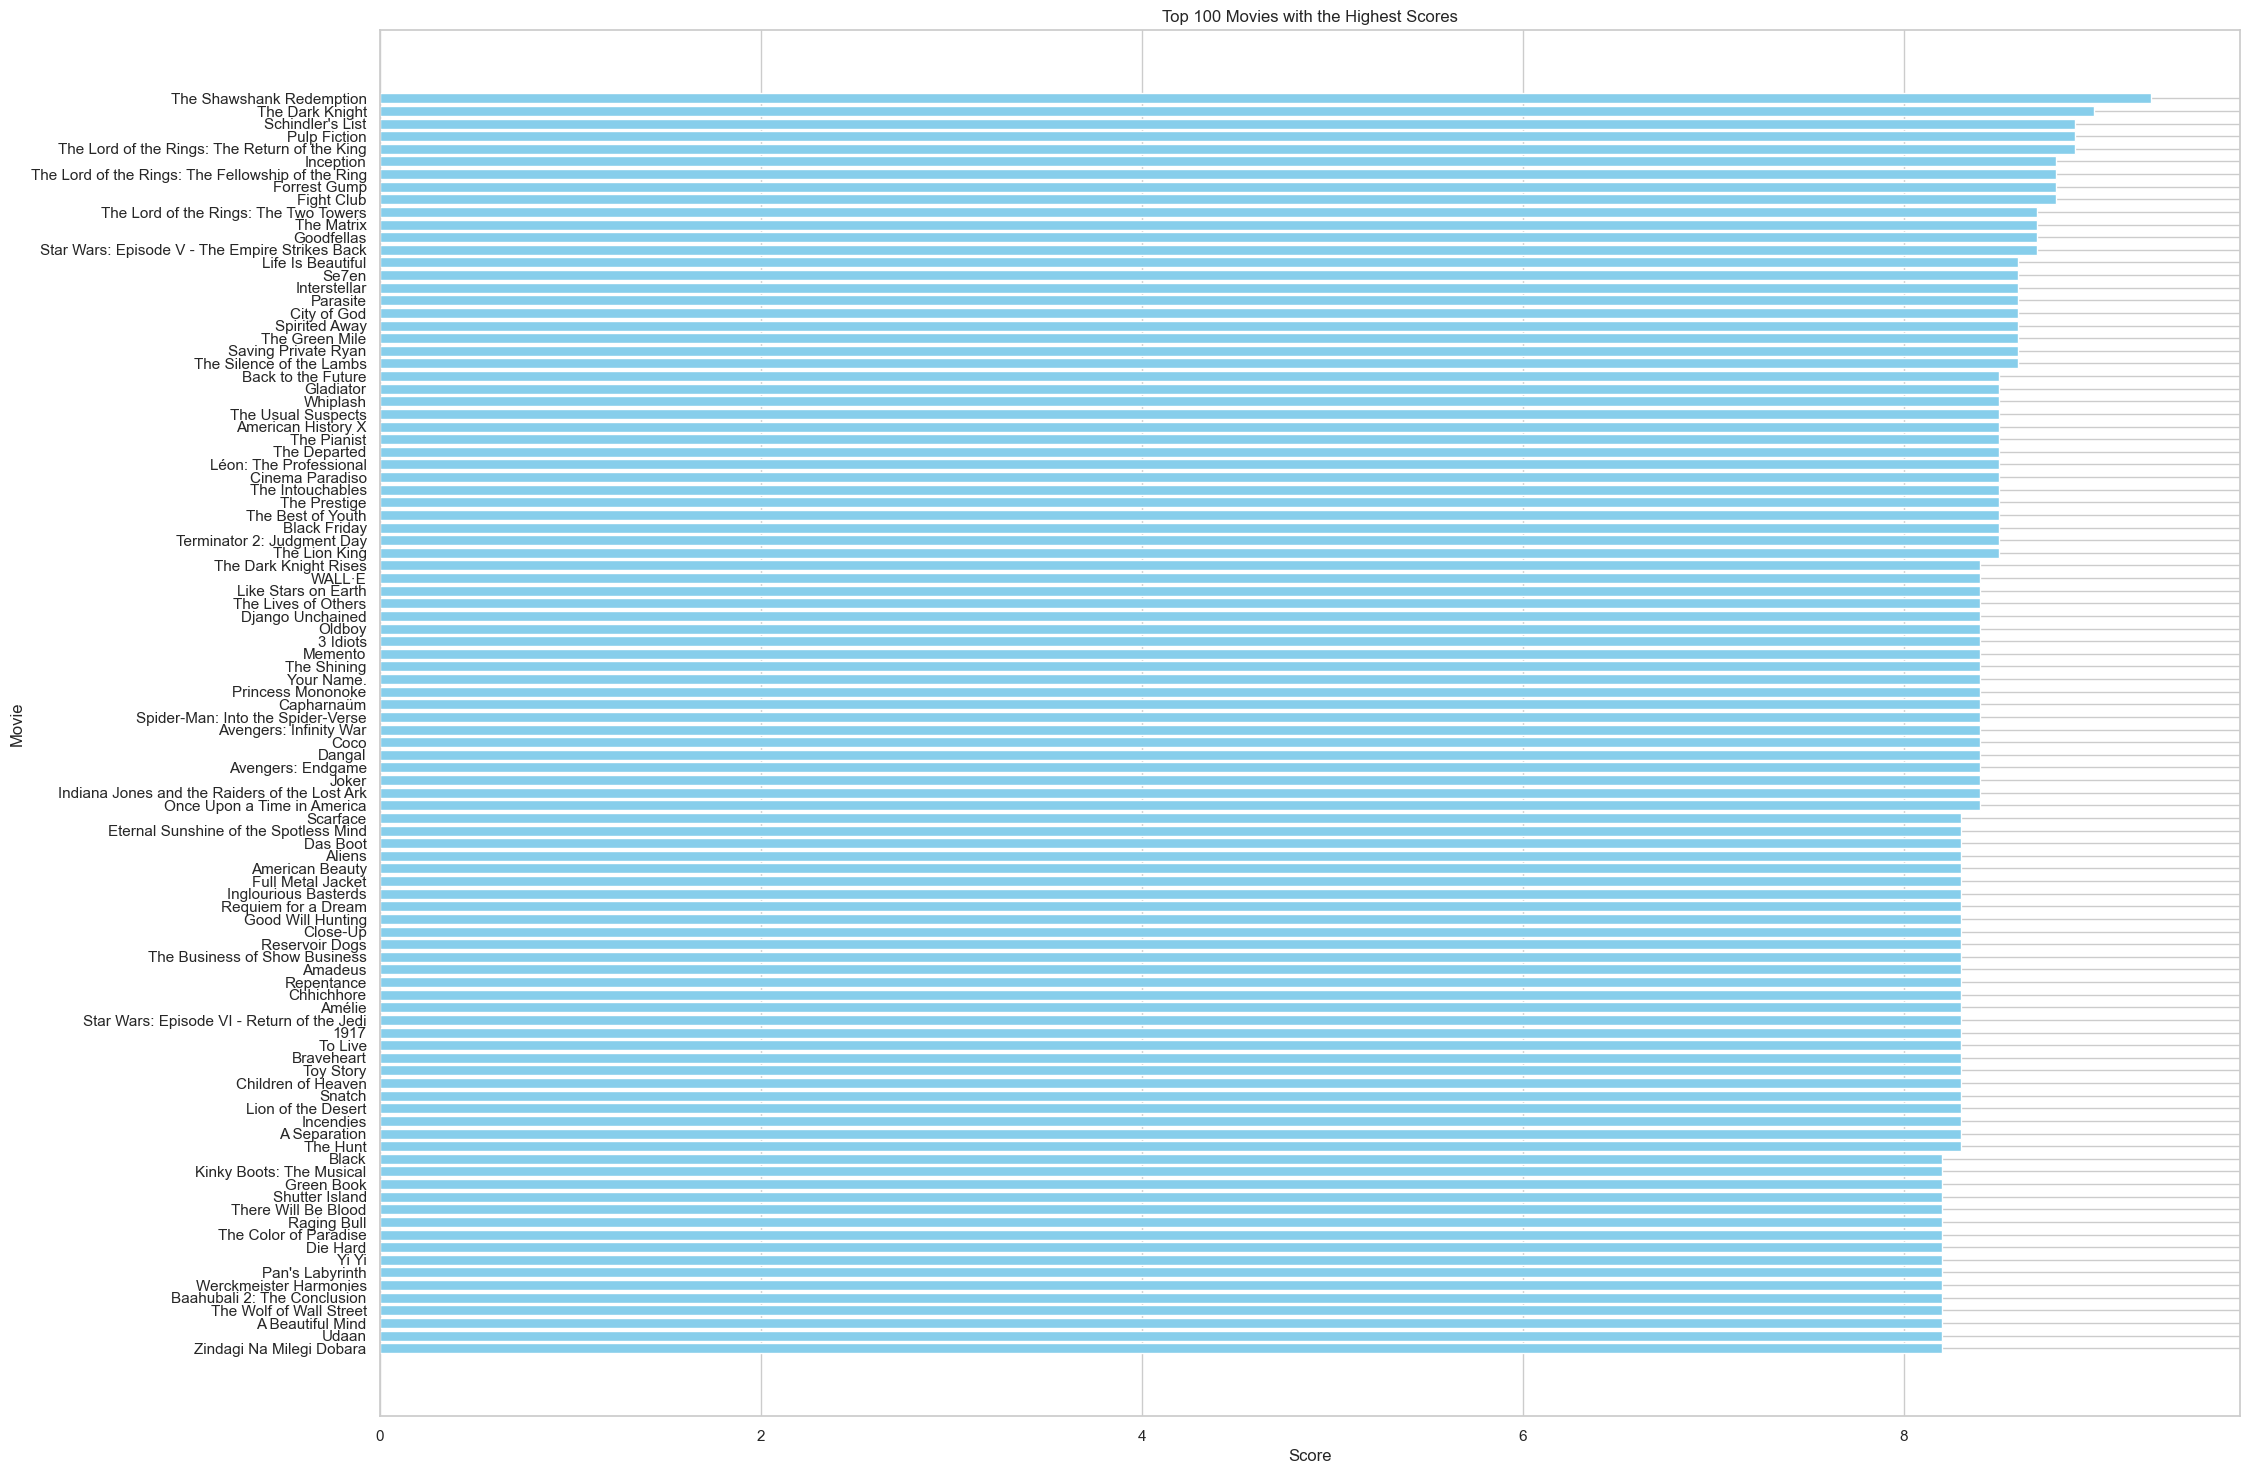

In [23]:
# Load the dataset
data = pd.read_csv('movies.csv')

# Sort the dataset by score in descending order and select the top 100 movies
top_100_high_score = data.sort_values(by='score', ascending=False).head(100)

# Create a bar graph for the top 100 highest-scored movies
plt.figure(figsize=(24, 18))
plt.barh(top_100_high_score['name'], top_100_high_score['score'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Movie')
plt.title('Top 100 Movies with the Highest Scores')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest scoring movie at the top
plt.show()


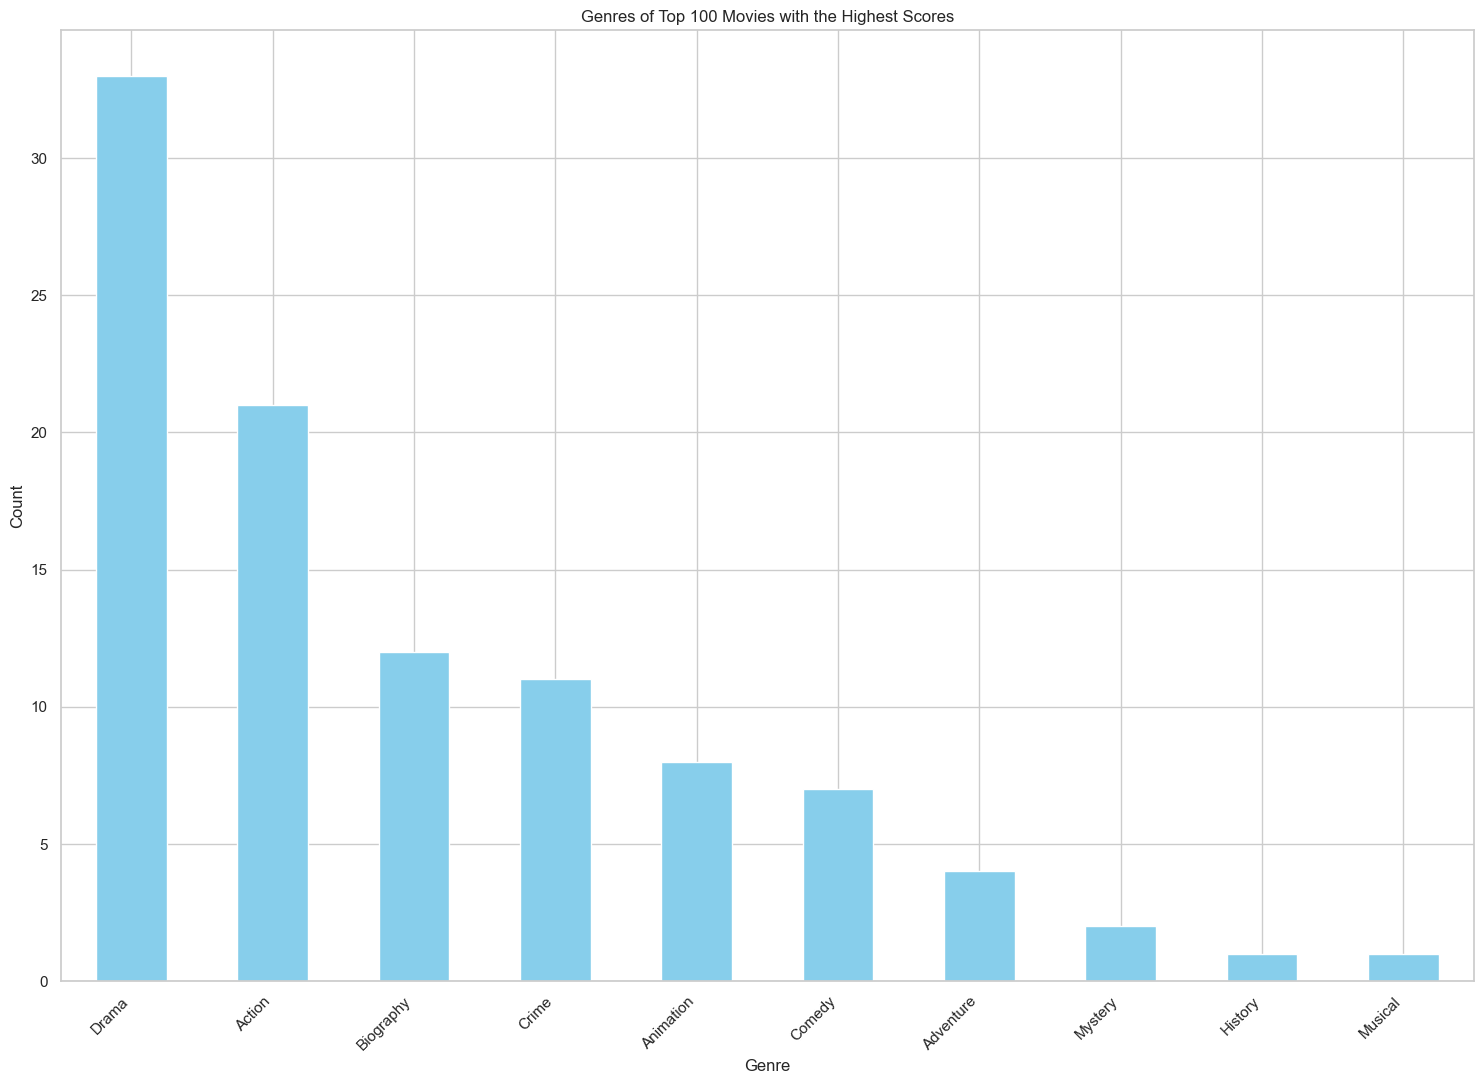

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('movies.csv')

# Sort the dataset by score in descending order and select the top 100 movies
top_100_high_score = data.sort_values(by='score', ascending=False).head(100)

# Count the occurrences of each genre in the top 100 movies
genre_counts = top_100_high_score['genre'].value_counts()

# Create a bar plot for the genres of the top 100 highest-scored movies
plt.figure(figsize=(15, 11))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genres of Top 100 Movies with the Highest Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


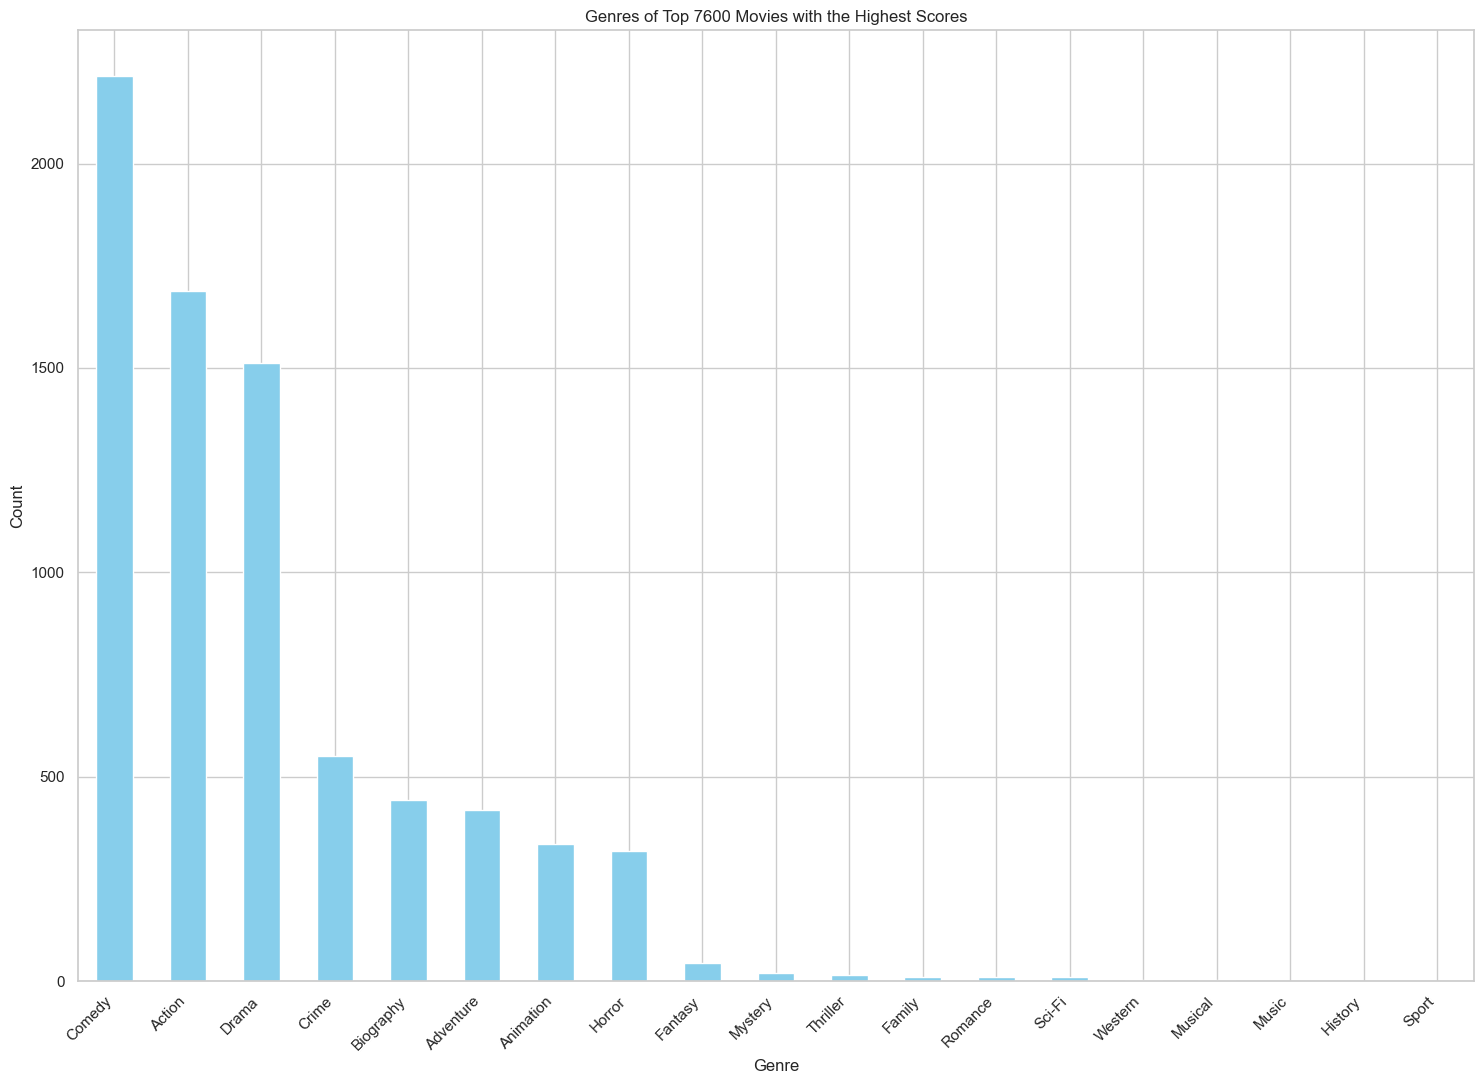

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('movies.csv')

# Sort the dataset by score in descending order and select the top 7600 movies
top_100_high_score = data.sort_values(by='score', ascending=False).head(7600)

# Count the occurrences of each genre in the top 7600 movies
genre_counts = top_100_high_score['genre'].value_counts()

# Create a bar plot for the genres of the top 7600 highest-scored movies
plt.figure(figsize=(15, 11))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genres of Top 7600 Movies with the Highest Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


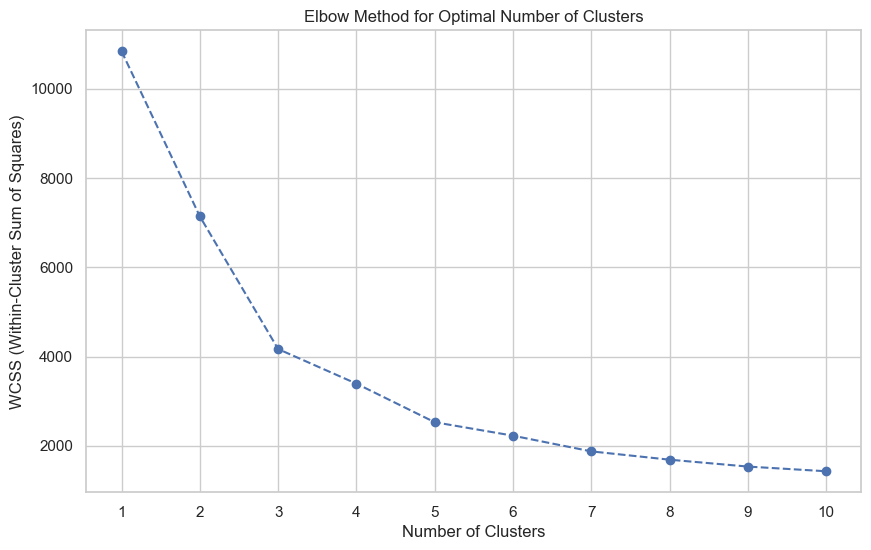

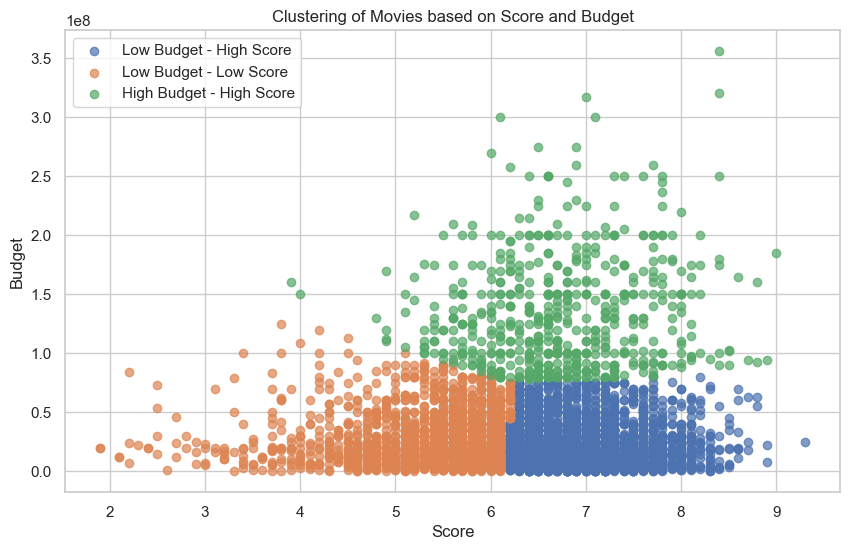

In [26]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('movies.csv')

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Select relevant features for clustering
X = data[['score', 'budget']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Perform K-means clustering with the optimal number of clusters
optimal_num_clusters = 3  # Choose the optimal number of clusters based on the Elbow method
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
data['cluster'] = clusters

# Assign specific names to clusters
cluster_names = {
    0: "Low Budget - High Score",
    1: "High Budget - High Score",
    2: "Low Budget - Low Score"
}

# Replace numeric cluster labels with descriptive names
data['cluster_name'] = data['cluster'].map(cluster_names)

# Visualize the clusters with specific names
plt.figure(figsize=(10, 6))
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['score'], cluster_data['budget'], label=f'{cluster_names[cluster]}', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Budget')
plt.title('Clustering of Movies based on Score and Budget')
plt.legend()
plt.grid(True)
plt.show()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


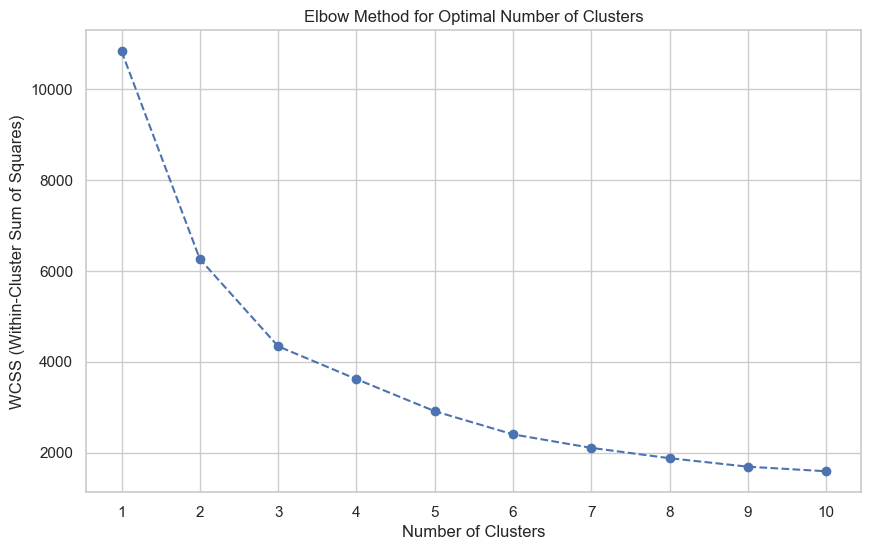

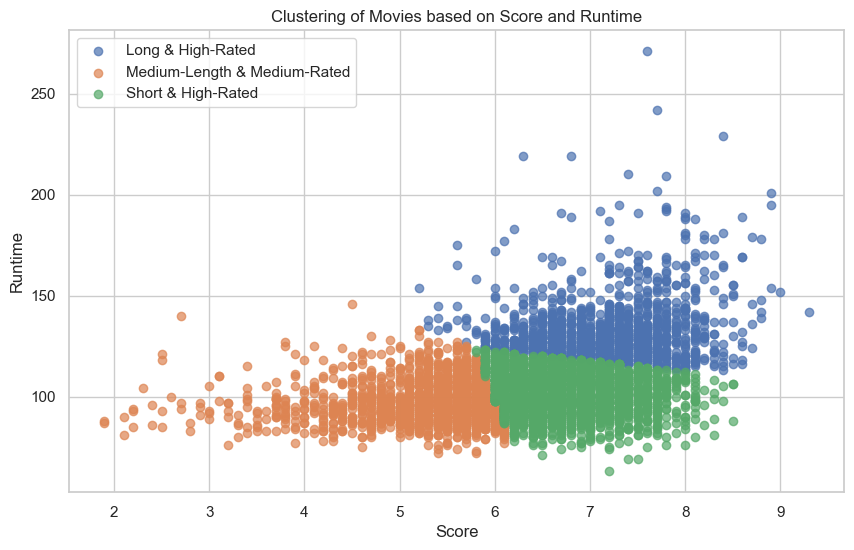

In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('movies.csv')

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Select relevant features for clustering
X = data[['score', 'runtime']]  # Change the features to 'score' and 'runtime'

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Perform K-means clustering with the optimal number of clusters
optimal_num_clusters = 3  # Choose the optimal number of clusters based on the Elbow method
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
data['cluster'] = clusters

# Assign specific names to clusters
cluster_names = {
    0: "Short & High-Rated",
    1: "Medium-Length & Medium-Rated",
    2: "Long & High-Rated"
}

# Replace numeric cluster labels with descriptive names
data['cluster_name'] = data['cluster'].map(cluster_names)

# Visualize the clusters with specific names
plt.figure(figsize=(10, 6))
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['score'], cluster_data['runtime'], label=f'{cluster_names[cluster]}', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Runtime')
plt.title('Clustering of Movies based on Score and Runtime')
plt.legend()
plt.grid(True)
plt.show()


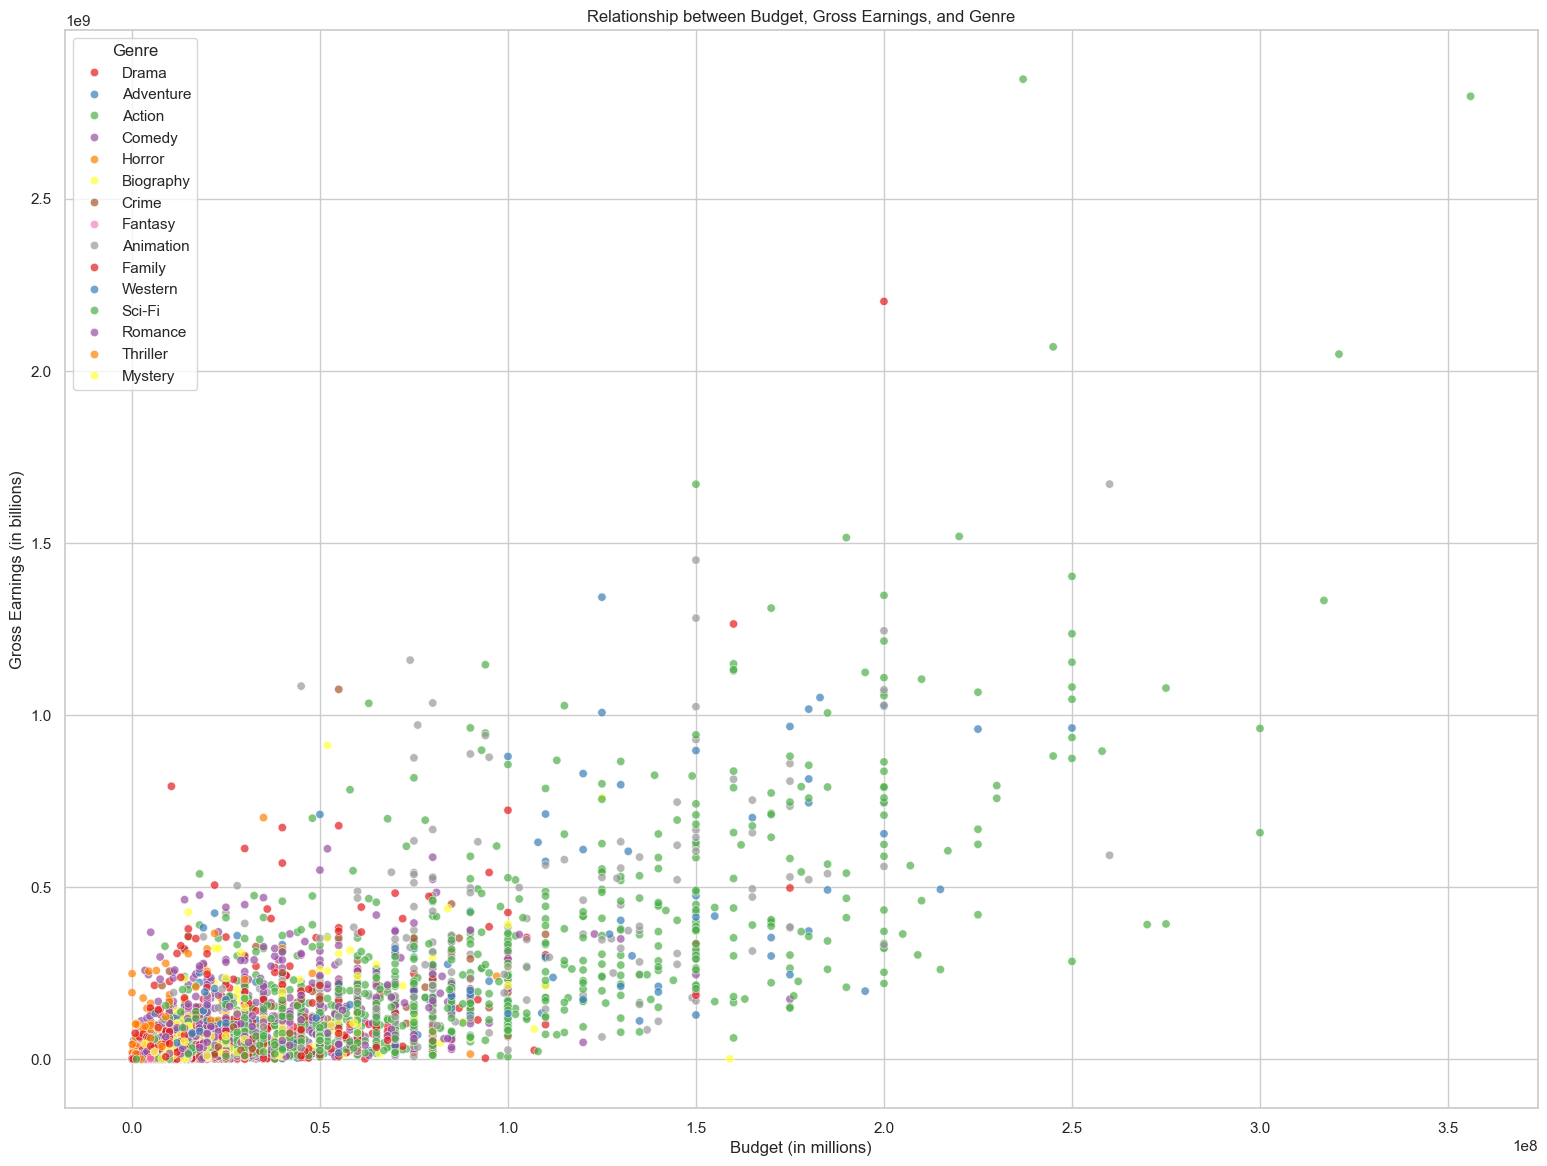

In [28]:


# Load the dataset
data = pd.read_csv('movies.csv')

# Select relevant columns for analysis
columns = ['genre', 'budget', 'gross']

# Remove rows with missing values in selected columns
data = data.dropna(subset=columns)

# Explore the relationship between genres, budgets, and gross earnings
plt.figure(figsize=(19, 14))
sns.scatterplot(x='budget', y='gross', hue='genre', data=data, palette='Set1', alpha=0.7)
plt.title('Relationship between Budget, Gross Earnings, and Genre')
plt.xlabel('Budget (in millions)')
plt.ylabel('Gross Earnings (in billions)')
plt.legend(title='Genre')
plt.grid(True)
plt.show()
